# Sentiment Classification & How To "Frame Problems" for a Neural Network

Ideas from Andrew Trask

### What You Should Already Know

- neural networks, forward and back-propagation
- stochastic gradient descent
- mean squared error
- and train/test splits


### Tutorial Outline:

- Intro: The Importance of "Framing a Problem"


- Curate a Dataset
- Developing a "Predictive Theory"
- **PROJECT 1**: Quick Theory Validation


- Transforming Text to Numbers
- **PROJECT 2**: Creating the Input/Output Data


- Putting it all together in a Neural Network
- **PROJECT 3**: Building our Neural Network


- Understanding Neural Noise
- **PROJECT 4**: Making Learning Faster by Reducing Noise


- Analyzing Inefficiencies in our Network
- **PROJECT 5**: Making our Network Train and Run Faster


- Further Noise Reduction
- **PROJECT 6**: Reducing Noise by Strategically Reducing the Vocabulary


- Analysis: What's going on in the weights?

# Lesson: Curate a Dataset

In [8]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1], g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(), g.readlines()))
g.close()

In [9]:
len(reviews)

25000

In [10]:
g = open('reviews.txt','r') # What we know!
review_map = map(lambda x:x[:-1],g.readlines())
review_map

In [11]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [12]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory

In [13]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


Get the words

In [14]:
# Dict subclass for counting hashable items.  Sometimes called a bag
# or multiset.  Elements are stored as dictionary keys and their counts
# are stored as dictionary values.
from collections import Counter
c = Counter()

# store positive words and negative words
pos_words = []
neg_words = []
# for each review check weather it is positive or negative according to the label
for i, review in enumerate(reviews):
    # split the review in a list of words
    words = review.split(sep=" ")
    # add the words to their corresponding list
    if (labels[i] == 'POSITIVE'):
        # use extend instead of append because append would append the whole words list instead of its elements
        pos_words.extend(words) 
    else:
        neg_words.extend(words) # use extend instead of append!
        
# count the words in positive and negative word list and create a dictionary
pos_words_count = Counter(pos_words)
neg_words_count = Counter(neg_words)

# all words
all_words = pos_words + neg_words
all_words_count = Counter(all_words)

In [15]:
# words most frequently seen in a review with a "POSITIVE" label
pos_words_count.most_common()[0:30]

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655)]

In [16]:
# words most frequently seen in a review with a "NEGATIVE" label
neg_words_count.most_common()[0:30]

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327),
 ('i', 46880),
 ('in', 43753),
 ('this', 40920),
 ('that', 37615),
 ('s', 31546),
 ('was', 26291),
 ('movie', 24965),
 ('for', 21927),
 ('but', 21781),
 ('with', 20878),
 ('as', 20625),
 ('t', 20361),
 ('film', 19218),
 ('you', 17549),
 ('on', 17192),
 ('not', 16354),
 ('have', 15144),
 ('are', 14623),
 ('be', 14541),
 ('he', 13856)]

In [17]:
len(all_words_count)

74074

In [18]:
len(pos_words_count + neg_words_count)

74074

In [19]:
# use the ratios between positive and negative word counts
pos_neg_ratios = Counter()
minPosNegRatio = 1

# iterate through all words
for word, count in list(all_words_count.most_common()):
    # use only frequently used words 
    if (count > 100):
        pos_neg_ratio = pos_words_count[word] / float(neg_words_count[word]+1)
        #if (pos_neg_ratio < minPosNegRatio):
        #    minPosNegRatio = pos_neg_ratio
        #    print(minPosNegRatio)
        pos_neg_ratios[word] = pos_neg_ratio

In [20]:
import numpy as np

for word, ratio in pos_neg_ratios.most_common():
    # check if the ratio is greater or below 1
    # add 0.01 to avoid log(0) = -Inf (any small real positive number is fine)
    pos_neg_ratios[word] = np.log(ratio+0.01)
    #if (ratio > 1):
    #    pos_neg_ratios[word] = np.log(ratio)
    #else:
    #    pos_neg_ratios[word] = -np.log(1 / (ratio+0.01))
        #print("Word:", word, "Pos Count:", pos_words_count[word], "Neg Count:", neg_words_count[word], "Ratio:", ratio)
        #if (pos_words_count[word] < neg_words_count[word]):
            #import pdb pdb.set_trace()

In [21]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.6914396211402671),
 ('paulie', 4.0777069210690771),
 ('felix', 3.1531632815028194),
 ('polanski', 2.8239549306357077),
 ('matthau', 2.8073255731040887),
 ('victoria', 2.6817062257626079),
 ('mildred', 2.6034301519721073),
 ('gandhi', 2.5397630332720587),
 ('flawless', 2.4518667957098002),
 ('superbly', 2.2610684127911123),
 ('perfection', 2.1606374303383644),
 ('astaire', 2.1412419425852827),
 ('captures', 2.0399207835175526),
 ('voight', 2.0314827625832694),
 ('wonderfully', 2.0232192220746748),
 ('powell', 1.9797274480975922),
 ('brosnan', 1.9562140241935853),
 ('lily', 1.9218412914691674),
 ('bakshi', 1.9044752216320198),
 ('lincoln', 1.9029507788063733),
 ('refreshing', 1.8567443193174678),
 ('breathtaking', 1.8496865086946379),
 ('bourne', 1.8494234532515561),
 ('lemmon', 1.8474043926399484),
 ('delightful', 1.8019213373231431),
 ('flynn', 1.8013168264446966),
 ('andrews', 1.7781828744504002),
 ('homer', 1.770989707741669),
 ('beautifully', 1.7644096836449761),
 ('socc

In [22]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('boll', -4.0778152602708904),
 ('uwe', -3.9218753018711574),
 ('seagal', -3.3202501058581921),
 ('unwatchable', -3.0269848170580955),
 ('stinker', -2.9876839403711624),
 ('mst', -2.7753833211707972),
 ('incoherent', -2.7641396677532537),
 ('unfunny', -2.5545257844967644),
 ('waste', -2.4907515123361046),
 ('blah', -2.4475792789485),
 ('horrid', -2.3715779644809971),
 ('pointless', -2.3451073877136341),
 ('atrocious', -2.3187369339642556),
 ('redeeming', -2.2667790015910296),
 ('prom', -2.2601040980178784),
 ('drivel', -2.2476029585766928),
 ('lousy', -2.2118080125207054),
 ('worst', -2.1930856334332267),
 ('laughable', -2.172468615469592),
 ('awful', -2.1385076866397488),
 ('poorly', -2.1326133844207011),
 ('wasting', -2.1178155545614512),
 ('remotely', -2.111046881095167),
 ('existent', -2.0024805005437076),
 ('boredom', -1.9241486572738005),
 ('miserably', -1.9216610938019989),
 ('sucks', -1.9166645809588516),
 ('uninspired', -1.9131499212248517),
 ('lame', -1.9117232884159072),
 (

# Transforming Text into Numbers

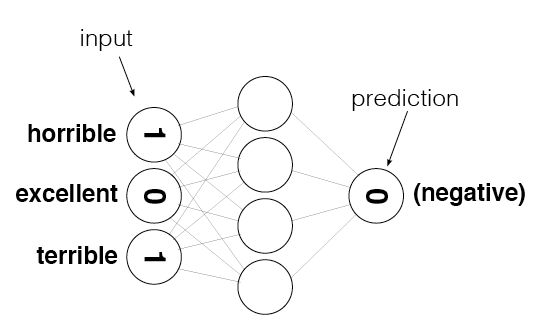

In [23]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

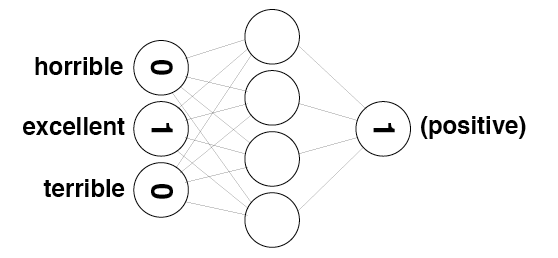

In [24]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# Project 2: Creating the Input/Output Data

In [ ]:
# use the keys from all_words_count dictionary because it contains all words in the vocabulary once

In [32]:
# count all words in the reviews (also repeated words)
len(all_words)

7459318

In [31]:
# count every word that is in the reviews once
len(all_words_count)

74074

In [65]:
# create a vocabulary with all the possible words from the reviews
vocab = set(all_words_count.keys())
sz_vocab = len(vocab)
sz_vocab

74074

In [67]:
# create a dictionary to look up the words in our dictionary
word2index = {}

for i, word in enumerate(vocab):
    word2index[word] = i
word2index

{'': 0,
 'windom': 1,
 'subsides': 2,
 'puya': 3,
 'kaedin': 4,
 'tumult': 5,
 'foible': 6,
 'eddie': 7,
 'vault': 8,
 'boffing': 50315,
 'amani': 9,
 'housewives': 10,
 'laila': 11,
 'palmentari': 13,
 'ostentatious': 14,
 'frisk': 19,
 'marrow': 18,
 'mechas': 20,
 'censor': 21,
 'derringer': 22,
 'miraculous': 23,
 'liberated': 24,
 'glynn': 25,
 'tuo': 32,
 'tooo': 27,
 'conway': 28,
 'tasteful': 30,
 'honking': 31,
 'willfulness': 35,
 'fuck': 37,
 'leander': 42621,
 'trivialization': 40,
 'hovering': 39,
 'unicorns': 14207,
 'campfest': 41,
 'squandered': 49306,
 'grue': 64129,
 'fittest': 44,
 'rossi': 45,
 'os': 47,
 'throughout': 48,
 'monsta': 50,
 'dulled': 51,
 'genisis': 49308,
 'wussy': 53,
 'polk': 61621,
 'mishra': 55,
 'losco': 56,
 'distraction': 57,
 'sharing': 58,
 'delivered': 29614,
 'instances': 59,
 'bridesmaid': 60,
 'foothold': 62,
 'trashiness': 63,
 'marconi': 65,
 'heterai': 66,
 'genial': 32436,
 'endeared': 49311,
 'hornblower': 67,
 'anna': 68,
 'dodges'

In [94]:
# create a global variable for the input layer
global layer_0
# pre allocate the size for the vocabulary input vector
layer_0 = np.zeros((1,sz_vocab))
layer_0

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [104]:
# DO NOT PREGENERATE THE ENTIRE DATA SET BECAUSE THIS WOULD BE A MATRIX
# OF SIZE SZ_VOCAB * LEN(REVIEWS) = 1851850000
print(sz_vocab, '+', len(reviews), '=', sz_vocab * len(reviews))

74074 + 25000 = 1851850000


In [105]:
def update_input_layer(review):
    """ Modify the global layer_0 to represent the vector form of review.
    The element at a given index of layer_0 should represent \
    how many times the given word occurs in the review.
    Args:
        review(string) - the string of the review
    Returns:
        None
    """
    global layer_0
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    # for each word in a review increase the input number to the corresponding input neuron using the word2index dict
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1
    #for i, word in enumerate(vocab):
    #    if (word in review.split(" ")):
    #        layer_0[0][i] += 1

# test the update_input_layer function
update_input_layer(reviews[0])
layer_0

array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

In [106]:
def get_target_for_label(label):
    """Convert a label to `0` or `1`.
    Args:
        label(string) - Either "POSITIVE" or "NEGATIVE".
    Returns:
        `0` or `1`.
    """
    if (label == 'POSITIVE'):
        return 1
    else:
        return 0

In [107]:
# test the get_target_for_label function
print(labels[0])
get_target_for_label(labels[0])

POSITIVE


1

In [108]:
# test the get_target_for_label function
print(labels[1])
get_target_for_label(labels[1])

NEGATIVE


0

# Project 3: Building a Neural Network

- Start with your neural network from the last chapter
- 3 layer neural network
- no non-linearity in hidden layer
- use our functions to create the training data
- create a "pre_process_data" function to create vocabulary for our training data generating functions
- modify "train" to train over the entire corpus

In [112]:
import time
import sys
import numpy as np

class SentimentNetwork:
    #def __init__(self, input_nodes, hidden_nodes, output_nodes=1, learning_rate=0.01):
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        
        # set our random number generator 
        np.random.seed(1)
    
        self.pre_process_data(reviews, labels)
        
        self.init_network(self.review_vocab_size, hidden_nodes, 1, learning_rate)
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights from input to hidden layer with zeros 
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
        # Initialize weights from the hidden to output layer
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, # mu and sigma
                                                (self.hidden_nodes, self.output_nodes)) # size
        
        # learning rate
        self.learning_rate = learning_rate
        
        # initialize inputs with zeros
        self.layer_0 = np.zeros((1,input_nodes))
        
        
    def pre_process_data(self, reviews, labels):
        
        # create a set containing all words from the reviews
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        # create member variable for the complete reviews vocabulary
        self.review_vocab = list(review_vocab)
        
        # create a set containing all the possible labels (only two in our case 'POSITIVE' and 'NEGATIVE')
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        # create member variable for the label vocabulary
        self.label_vocab = list(label_vocab)
        
        # create member variables for the vocabulary sizes
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # create a dictionary to map the words to the input index 
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        # create a dictionary to map the label to the output index (only two in our case 'POSITIVE' and 'NEGATIVE')
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
        
        
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        # go through each word of the review 
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                # update the input layer at the corresponding input position for that word
                self.layer_0[0][self.word2index[word]] += 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        
        # check weather number of reviews is the same as number of corresponding labels
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass ####
            ### Forward pass ###

            # Update the input layer
            self.update_input_layer(review)

            # Hidden Layer
            # first add and the inputs with the multiplied weights
            layer_1 = self.layer_0.dot(self.weights_0_1)
            # calculate the output from the hidden layer using the linear funciton f(x) = x
            layer_1 = layer_1

            # Output layer
            # first add and the inputs with the multiplied weights
            layer_2 = layer_1.dot(self.weights_1_2)
            # calculate the output from the output layer using the sigmoid function f(x) = 1 / (1 + exp(-x))
            layer_2 = self.sigmoid(layer_2)

            #### Implement the backward pass ####
            ### Backward pass ###
            
            # Output error
            # Output layer error is the difference between desired actual output (prediciton) and target (goal).
            # prediction, actual output = layer_2
            # target, goal = self.get_target_for_label(label)
            layer_2_error = layer_2 - self.get_target_for_label(label) 
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            # errors propagated to the hidden layer
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) 
            layer_1_delta = layer_1_error * 1 # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            # delta w = learning_rate * (target - prediction) * gradient(sum(w*input)) * input
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            # check how many predictions are correct
            # pred = 1 and actual value = 0 => layer_2_error = -1 => abs(layer_2_error) = 1
            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            # output progress of processed reviews as percentage  100 * i/num_of_total_reviews
            # output number of reviews processed since the beginning of the training
            # output number of correctly classified reviews and the total number of processed reviews
            # output training accuracy as a percantage value 100 * correct_so_far/total_number_of_reviews_procesed
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + \
                             "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + \
                             " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + \
                             " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
        
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            # forward pass
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            # output progress of processed reviews as percentage  100 * i/num_of_total_reviews
            # output number of reviews processed since the beginning of the training
            # output number of correctly classified reviews and the total number of processed reviews
            # output training accuracy as a percantage value 100 * correct_so_far/total_number_of_reviews_procesed
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + \
                             " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Update the input layer vector with the review
        self.update_input_layer(review.lower())

        ## Forward Pass ##
        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"

In [114]:
# to initialize the network we use the first 24.000 reviews
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [115]:
# evaluate our model before training (just to show how horrible it is)
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):1019.% #Correct:500 #Tested:1000 Testing Accuracy:50.0%

In [116]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):144.5 #Correct:1250 #Trained:2501 Training Accuracy:49.9%
Progress:20.8% Speed(reviews/sec):138.5 #Correct:2500 #Trained:5001 Training Accuracy:49.9%
Progress:31.2% Speed(reviews/sec):135.3 #Correct:3750 #Trained:7501 Training Accuracy:49.9%
Progress:41.6% Speed(reviews/sec):128.4 #Correct:5000 #Trained:10001 Training Accuracy:49.9%
Progress:52.0% Speed(reviews/sec):124.4 #Correct:6250 #Trained:12501 Training Accuracy:49.9%
Progress:62.5% Speed(reviews/sec):124.2 #Correct:7500 #Trained:15001 Training Accuracy:49.9%
Progress:72.9% Speed(reviews/sec):123.7 #Correct:8750 #Trained:17501 Training Accuracy:49.9%
Progress:83.3% Speed(reviews/sec):124.3 #Correct:10000 #Trained:20001 Training Accuracy:49.9%
Progress:93.7% Speed(reviews/sec):126.5 #Correct:11250 #Trained:22501 Training Accuracy:49.9%
Progress:99.9% Speed(reviews/sec):126.3 #Correct:11999 #Trained:24000 Training Acc

Because the training accuracy is not increasing we use a smaller learning rate

In [117]:
# initialize the network using a smaller learning rate
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)

In [118]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):128.5 #Correct:1259 #Trained:2501 Training Accuracy:50.3%
Progress:20.8% Speed(reviews/sec):119.4 #Correct:2581 #Trained:5001 Training Accuracy:51.6%
Progress:31.2% Speed(reviews/sec):119.6 #Correct:3977 #Trained:7501 Training Accuracy:53.0%
Progress:41.6% Speed(reviews/sec):119.4 #Correct:5464 #Trained:10001 Training Accuracy:54.6%
Progress:52.0% Speed(reviews/sec):122.0 #Correct:7020 #Trained:12501 Training Accuracy:56.1%
Progress:62.5% Speed(reviews/sec):119.3 #Correct:8584 #Trained:15001 Training Accuracy:57.2%
Progress:72.9% Speed(reviews/sec):120.3 #Correct:10169 #Trained:17501 Training Accuracy:58.1%
Progress:83.3% Speed(reviews/sec):119.9 #Correct:11753 #Trained:20001 Training Accuracy:58.7%
Progress:93.7% Speed(reviews/sec):119.2 #Correct:13367 #Trained:22501 Training Accuracy:59.4%
Progress:99.9% Speed(reviews/sec):118.5 #Correct:14406 #Trained:24000 Training Ac

# Understanding Neural Noise
What is the signal in the training data and what is the noise

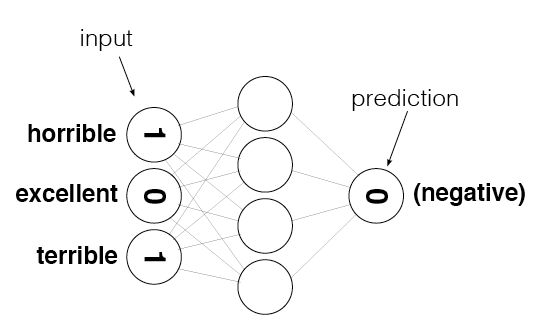

In [119]:
from IPython.display import Image
Image(filename='sentiment_network.png')

The input to the hidden layer is a weighted sum of the inputs. Looking at the image we see that if an input has a high value which gets weighted, this results in a high input to the hidden layer. If we have noise that that happens often, this will get amplified which is not what we want. We want to keep the noise (keep the Signal to Nois ratio SNR high)

In [128]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [129]:
layer_0

array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

instead of adding +1 for a word that can come up multiple times in our review, just consider it if is in the review or not. The 18 is generated by having 18 '' empty words in the given review. These are considered to be noise which should be removed.

If we print the dominant words we se that they have nothing to do with sentiment

In [147]:
# print out the most common words
review_counter = Counter()

for word in reviews[0].split(" "):
    review_counter[word] += 1
    
review_counter.most_common()[:50]

[('.', 27),
 ('', 18),
 ('the', 9),
 ('to', 6),
 ('i', 5),
 ('high', 5),
 ('bromwell', 4),
 ('is', 4),
 ('that', 4),
 ('teachers', 4),
 ('a', 4),
 ('of', 4),
 ('at', 2),
 ('me', 2),
 ('their', 2),
 ('in', 2),
 ('student', 2),
 ('as', 2),
 ('school', 2),
 ('it', 2),
 ('students', 2),
 ('my', 2),
 ('comedy', 1),
 ('situation', 1),
 ('survive', 1),
 ('pomp', 1),
 ('what', 1),
 ('see', 1),
 ('much', 1),
 ('all', 1),
 ('who', 1),
 ('teaching', 1),
 ('pity', 1),
 ('believe', 1),
 ('here', 1),
 ('line', 1),
 ('s', 1),
 ('which', 1),
 ('sack', 1),
 ('welcome', 1),
 ('far', 1),
 ('down', 1),
 ('ran', 1),
 ('expect', 1),
 ('some', 1),
 ('cartoon', 1),
 ('immediately', 1),
 ('years', 1),
 ('same', 1),
 ('whole', 1)]

Therefore we update our update_input_function to create only ones and zeros at the input layer.
1 if a word is in the review or 0 if it is not. This is done to stop weighing the filler words like "is, a, the, ...".

In [138]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] = 1

update_input_layer(reviews[0])

In [139]:
layer_0

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.]])

In [144]:
reviews[0].split(" ")

['bromwell',
 'high',
 'is',
 'a',
 'cartoon',
 'comedy',
 '.',
 'it',
 'ran',
 'at',
 'the',
 'same',
 'time',
 'as',
 'some',
 'other',
 'programs',
 'about',
 'school',
 'life',
 '',
 'such',
 'as',
 '',
 'teachers',
 '',
 '.',
 'my',
 '',
 '',
 'years',
 'in',
 'the',
 'teaching',
 'profession',
 'lead',
 'me',
 'to',
 'believe',
 'that',
 'bromwell',
 'high',
 '',
 's',
 'satire',
 'is',
 'much',
 'closer',
 'to',
 'reality',
 'than',
 'is',
 '',
 'teachers',
 '',
 '.',
 'the',
 'scramble',
 'to',
 'survive',
 'financially',
 '',
 'the',
 'insightful',
 'students',
 'who',
 'can',
 'see',
 'right',
 'through',
 'their',
 'pathetic',
 'teachers',
 '',
 'pomp',
 '',
 'the',
 'pettiness',
 'of',
 'the',
 'whole',
 'situation',
 '',
 'all',
 'remind',
 'me',
 'of',
 'the',
 'schools',
 'i',
 'knew',
 'and',
 'their',
 'students',
 '.',
 'when',
 'i',
 'saw',
 'the',
 'episode',
 'in',
 'which',
 'a',
 'student',
 'repeatedly',
 'tried',
 'to',
 'burn',
 'down',
 'the',
 'school',
 '',

In [145]:
word2index['']

0

# Project 4: Reducing Noise in our Input Data

Here we change the network so that we don't weight the inputs by the word counts. Just remove the plus sign in the update input layer function. This generates a binary representation of the input vector

In [140]:
import time
import sys
import numpy as np

class SentimentNetwork:
    #def __init__(self, input_nodes, hidden_nodes, output_nodes=1, learning_rate=0.01):
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        
        # set our random number generator 
        np.random.seed(1)
    
        self.pre_process_data(reviews, labels)
        
        self.init_network(self.review_vocab_size, hidden_nodes, 1, learning_rate)
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights from input to hidden layer with zeros 
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
        # Initialize weights from the hidden to output layer
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, # mu and sigma
                                                (self.hidden_nodes, self.output_nodes)) # size
        
        # learning rate
        self.learning_rate = learning_rate
        
        # initialize inputs with zeros
        self.layer_0 = np.zeros((1,input_nodes))
        
        
    def pre_process_data(self, reviews, labels):
        
        # create a set containing all words from the reviews
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        # create member variable for the complete reviews vocabulary
        self.review_vocab = list(review_vocab)
        
        # create a set containing all the possible labels (only two in our case 'POSITIVE' and 'NEGATIVE')
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        # create member variable for the label vocabulary
        self.label_vocab = list(label_vocab)
        
        # create member variables for the vocabulary sizes
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # create a dictionary to map the words to the input index 
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        # create a dictionary to map the label to the output index (only two in our case 'POSITIVE' and 'NEGATIVE')
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
        
    ## updated function now we only consider if a word is in the review or not
    #  do not care how often the word occured in the review
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        # go through each word of the review 
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                # update the input layer at the corresponding input position for that word
                # instead of adding + 1 if for words we only set teh input to 1 or zero 
                # depening if the word is in the review or not
                self.layer_0[0][self.word2index[word]] = 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        
        # check weather number of reviews is the same as number of corresponding labels
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass ####
            ### Forward pass ###

            # Update the input layer
            self.update_input_layer(review)

            # Hidden Layer
            # first add and the inputs with the multiplied weights
            layer_1 = self.layer_0.dot(self.weights_0_1)
            # calculate the output from the hidden layer using the linear funciton f(x) = x
            layer_1 = layer_1

            # Output layer
            # first add and the inputs with the multiplied weights
            layer_2 = layer_1.dot(self.weights_1_2)
            # calculate the output from the output layer using the sigmoid function f(x) = 1 / (1 + exp(-x))
            layer_2 = self.sigmoid(layer_2)

            #### Implement the backward pass ####
            ### Backward pass ###
            
            # Output error
            # Output layer error is the difference between desired actual output (prediciton) and target (goal).
            # prediction, actual output = layer_2
            # target, goal = self.get_target_for_label(label)
            layer_2_error = layer_2 - self.get_target_for_label(label) 
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            # errors propagated to the hidden layer
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) 
            layer_1_delta = layer_1_error * 1 # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            # delta w = learning_rate * (target - prediction) * gradient(sum(w*input)) * input
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            # check how many predictions are correct
            # pred = 1 and actual value = 0 => layer_2_error = -1 => abs(layer_2_error) = 1
            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            # output progress of processed reviews as percentage  100 * i/num_of_total_reviews
            # output number of reviews processed since the beginning of the training
            # output number of correctly classified reviews and the total number of processed reviews
            # output training accuracy as a percantage value 100 * correct_so_far/total_number_of_reviews_procesed
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + \
                             "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + \
                             " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + \
                             " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
        
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            # forward pass
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            # output progress of processed reviews as percentage  100 * i/num_of_total_reviews
            # output number of reviews processed since the beginning of the training
            # output number of correctly classified reviews and the total number of processed reviews
            # output training accuracy as a percantage value 100 * correct_so_far/total_number_of_reviews_procesed
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + \
                             " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Update the input layer vector with the review
        self.update_input_layer(review.lower())

        ## Forward Pass ##
        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"

In [148]:
# initialize the network again with the first 24.000 reviews and their corresponding labels
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [149]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):121.2 #Correct:1815 #Trained:2501 Training Accuracy:72.5%
Progress:20.8% Speed(reviews/sec):132.7 #Correct:3800 #Trained:5001 Training Accuracy:75.9%
Progress:31.2% Speed(reviews/sec):132.7 #Correct:5907 #Trained:7501 Training Accuracy:78.7%
Progress:41.6% Speed(reviews/sec):130.5 #Correct:8027 #Trained:10001 Training Accuracy:80.2%
Progress:52.0% Speed(reviews/sec):129.1 #Correct:10155 #Trained:12501 Training Accuracy:81.2%
Progress:62.5% Speed(reviews/sec):127.1 #Correct:12291 #Trained:15001 Training Accuracy:81.9%
Progress:72.9% Speed(reviews/sec):128.9 #Correct:14413 #Trained:17501 Training Accuracy:82.3%
Progress:83.3% Speed(reviews/sec):130.6 #Correct:16575 #Trained:20001 Training Accuracy:82.8%
Progress:93.7% Speed(reviews/sec):130.6 #Correct:18774 #Trained:22501 Training Accuracy:83.4%
Progress:99.9% Speed(reviews/sec):129.6 #Correct:20088 #Trained:24000 Training 

In [152]:
# evaluate our model before training (just to show how horrible it is)
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):1107.% #Correct:849 #Tested:1000 Testing Accuracy:84.9%

By increasing the signal to noise ratio we got up to 84% of training and testing accuracy

Now that we solved the inefficcienties in our data inputs we want to tweak our network regarding the computation performance. When we look at the Speed(reviews/sec) we see that we are processing around 130 reviews/sec.
This can be improved.

# Analyzing Inefficiencies in our Network

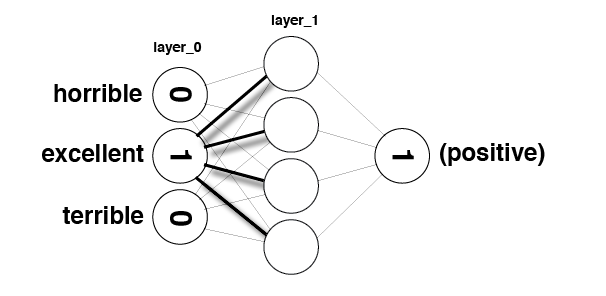

In [153]:
Image(filename='sentiment_network_sparse.png')

Our input for training is rather big 24.000 reviews times size of the vocabulary. Every time we input a review it contains a bunch of zeros which we multiply by the weights. This operation will result in a zero and should be avoided to increase the computation performance.

To show this we create a exemplary input word vector

In [176]:
layer_0 = np.zeros(10)
layer_0

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [177]:
# add some words to our input vector
layer_0[4] = 1
layer_0[9] = 1
layer_0

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.])

In [178]:
# create some random weight initialization matrix (10 inputs and 5 neurons in the hidden layer)
weights_0_1 = np.random.randn(10,5)
weights_0_1

array([[-1.37311732,  0.31515939,  0.84616065, -0.85951594,  0.35054598],
       [-1.31228341, -0.03869551, -1.61577235,  1.12141771,  0.40890054],
       [-0.02461696, -0.77516162,  1.27375593,  1.96710175, -1.85798186],
       [ 1.23616403,  1.62765075,  0.3380117 , -1.19926803,  0.86334532],
       [-0.1809203 , -0.60392063, -1.23005814,  0.5505375 ,  0.79280687],
       [-0.62353073,  0.52057634, -1.14434139,  0.80186103,  0.0465673 ],
       [-0.18656977, -0.10174587,  0.86888616,  0.75041164,  0.52946532],
       [ 0.13770121,  0.07782113,  0.61838026,  0.23249456,  0.68255141],
       [-0.31011677, -2.43483776,  1.0388246 ,  2.18697965,  0.44136444],
       [-0.10015523, -0.13644474, -0.11905419,  0.01740941, -1.12201873]])

In [179]:
# calculate the dot product to get the input to the hidden layer
# this will result in a 1x5 vector becasue we multiply layer_0 * weights_0_1
# or x * W 
# dimensions of x 1x10
# dimensions of W 10x5
layer_0.dot(weights_0_1)

array([-0.28107554, -0.74036537, -1.34911232,  0.5679469 , -0.32921186])

If we just consider the inputs with 1 we will get the same result faster.

In [180]:
# use the same indices as above
indices = [4, 9]
# create a new layer
layer_1 = np.zeros(5)

In [181]:
# for the input that contains a one we multiply it with the weights corresponding to that input
# here all the columns of rows 4 and 9
# and also add up the results from each input with a 1
for index in indices:
    print(weights_0_1[index])
    layer_1 += (1 * weights_0_1[index])

[-0.1809203  -0.60392063 -1.23005814  0.5505375   0.79280687]
[-0.10015523 -0.13644474 -0.11905419  0.01740941 -1.12201873]


In [182]:
layer_1

array([-0.28107554, -0.74036537, -1.34911232,  0.5679469 , -0.32921186])

The result working only partly with the matrix is the same as the vector matrix multiplicatino only faster.

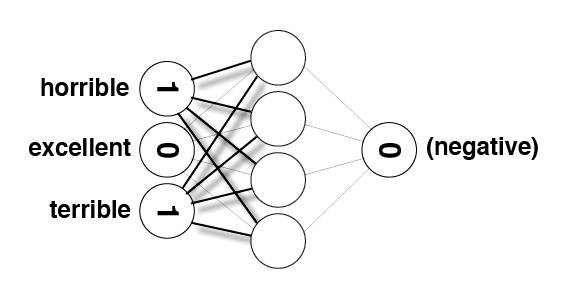

In [184]:
Image(filename='sentiment_network_sparse_2.png')

We can also avoid the multiplication by 1

In [188]:
# create a new layer
layer_1 = np.zeros(5)
for index in indices:
    print(weights_0_1[index])
    layer_1 += (weights_0_1[index])

[-0.1809203  -0.60392063 -1.23005814  0.5505375   0.79280687]
[-0.10015523 -0.13644474 -0.11905419  0.01740941 -1.12201873]


In [189]:
layer_1

array([-0.28107554, -0.74036537, -1.34911232,  0.5679469 , -0.32921186])

This efficincy improvement will be noticable when we have a lot of inputs where only some of them are one and the rest are zeros. Because using the vector matrix multiplication we would end up multiplying a vector of the vocabulary size with a matrix that is dependent on the size of the input vector and the number of neurons in the hidden layer.

# Project 5: Making our Network More Efficient

In [194]:
import time
import sys

# Let's tweak our network from before to model these phenomena
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
       
        np.random.seed(1)
    
        self.pre_process_data(reviews)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self,reviews):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
        self.layer_1 = np.zeros((1,hidden_nodes))
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            self.layer_0[0][self.word2index[word]] = 1

    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def train(self, training_reviews_raw, training_labels):
        
        # get the indices where the inputs are one for each review and each word of those reviews.
        # therefore create a training_reviews list that contains a set of indices. 
        # for each review a set is created that contains the 1 input indices for this review.
        # all these sets (which are convert to lists) are stored in the training_reviews list
        training_reviews = list()
        # iterate over all reviews
        for review in training_reviews_raw:
            # create a set for the indices
            indices = set()
            for word in review.split(" "):
                if(word in self.word2index.keys()):
                    indices.add(self.word2index[word])
            training_reviews.append(list(indices))
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i] # is now a list containing the indices that correspond to inputs that are one
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # The computation change update allows us to skip the input layer update
            # Input Layer

            # Hidden layer
            # updated forward pass from input to hidden layer (increased performance)
            # layer_1 = self.layer_0.dot(self.weights_0_1)
            self.layer_1 *= 0
            for index in review:
                # for each row of the weight matrix that that corresponds to a 1 input we add it to the result of the hidden layer
                # therefore we skip the zero inputs
                self.layer_1 += self.weights_0_1[index]
            
            # Output layer
            layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= self.layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            
            # updated the backward pass from hidden to input layer (increased performance)
            # we only use the inputs that were one because we multiply the delta W by the input when doing backpropagation
            # becasue if the input is a zero the subtraction form the previous weight is going to be zero and is not necessary therefore
            for index in review:
                # update input-to-hidden weights with gradient descent step
                self.weights_0_1[index] -= layer_1_delta[0] * self.learning_rate 

            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
        
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # The computation change update allows us to skip the input layer update
        # Update the input layer vector with the review
        #self.update_input_layer(review.lower())
        
        # Forward pass

        # Hidden layer
        self.layer_1 *= 0
        # create a set to store the indices where the input is one
        unique_indices = set() 
        # iterate over each word in the review
        for word in review.lower().split(" "):
            # if the word is in the word 2 index dictionary add it to the index set
            if word in self.word2index.keys():
                unique_indices.add(self.word2index[word])
        # select and add only the parts of the weight matrix that would be multiplied by inputs equal to one.
        for index in unique_indices:
            self.layer_1 += self.weights_0_1[index]
        
        # Output layer
        layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [196]:
# initialize the network again with the first 24.000 reviews and their corresponding labels
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [192]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Progress:99.9% Speed(reviews/sec):1979. #Correct:20071 #Trained:24000 Training Accuracy:83.6%

In [193]:
# evaluate our model before training (just to show how horrible it is)
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):1759.% #Correct:849 #Tested:1000 Testing Accuracy:84.9%

By getting rid of the multiplication by 1 and aoivd processing of inputs that are zero we sped up the training and testing process. Now the speed is around 2000 reviews/sec.

We can increase the training accuracy by keep training

In [198]:
# train the network
mlp.train(reviews[:-1000] * 2, labels[:-1000] * 2)

Progress:99.9% Speed(reviews/sec):1820. #Correct:41750 #Trained:48000 Training Accuracy:86.9%

Again we got better. But can we re frame the problem again to reduce even more noise.

# Further Noise Reduction

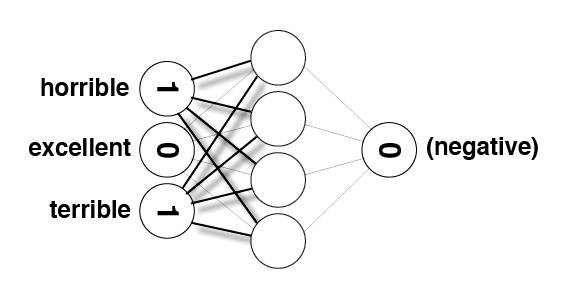

In [199]:
Image(filename='sentiment_network_sparse_2.png')

In [209]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.6914396211402671),
 ('paulie', 4.0777069210690771),
 ('felix', 3.1531632815028194),
 ('polanski', 2.8239549306357077),
 ('matthau', 2.8073255731040887),
 ('victoria', 2.6817062257626079),
 ('mildred', 2.6034301519721073),
 ('gandhi', 2.5397630332720587),
 ('flawless', 2.4518667957098002),
 ('superbly', 2.2610684127911123),
 ('perfection', 2.1606374303383644),
 ('astaire', 2.1412419425852827),
 ('captures', 2.0399207835175526),
 ('voight', 2.0314827625832694),
 ('wonderfully', 2.0232192220746748),
 ('powell', 1.9797274480975922),
 ('brosnan', 1.9562140241935853),
 ('lily', 1.9218412914691674),
 ('bakshi', 1.9044752216320198),
 ('lincoln', 1.9029507788063733),
 ('refreshing', 1.8567443193174678),
 ('breathtaking', 1.8496865086946379),
 ('bourne', 1.8494234532515561),
 ('lemmon', 1.8474043926399484),
 ('delightful', 1.8019213373231431),
 ('flynn', 1.8013168264446966),
 ('andrews', 1.7781828744504002),
 ('homer', 1.770989707741669),
 ('beautifully', 1.7644096836449761),
 ('socc

By looking at the most common words in a positive review, we see that these are mostly names.
The same goes for negative reviews:

In [201]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('boll', -4.0778152602708904),
 ('uwe', -3.9218753018711574),
 ('seagal', -3.3202501058581921),
 ('unwatchable', -3.0269848170580955),
 ('stinker', -2.9876839403711624),
 ('mst', -2.7753833211707972),
 ('incoherent', -2.7641396677532537),
 ('unfunny', -2.5545257844967644),
 ('waste', -2.4907515123361046),
 ('blah', -2.4475792789485),
 ('horrid', -2.3715779644809971),
 ('pointless', -2.3451073877136341),
 ('atrocious', -2.3187369339642556),
 ('redeeming', -2.2667790015910296),
 ('prom', -2.2601040980178784),
 ('drivel', -2.2476029585766928),
 ('lousy', -2.2118080125207054),
 ('worst', -2.1930856334332267),
 ('laughable', -2.172468615469592),
 ('awful', -2.1385076866397488),
 ('poorly', -2.1326133844207011),
 ('wasting', -2.1178155545614512),
 ('remotely', -2.111046881095167),
 ('existent', -2.0024805005437076),
 ('boredom', -1.9241486572738005),
 ('miserably', -1.9216610938019989),
 ('sucks', -1.9166645809588516),
 ('uninspired', -1.9131499212248517),
 ('lame', -1.9117232884159072),
 (

This means that we want words that have a high ratio magnitude (high positive or low negative values). Words with a ratio around zero don't tell us much weather they belong to a positive or a ngative review.

Therfore we plot the distribution of the pos_neg_ratios:

In [202]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [211]:
list(map(lambda x:x[1],pos_neg_ratios.most_common()))

[4.6914396211402671,
 4.0777069210690771,
 3.1531632815028194,
 2.8239549306357077,
 2.8073255731040887,
 2.6817062257626079,
 2.6034301519721073,
 2.5397630332720587,
 2.4518667957098002,
 2.2610684127911123,
 2.1606374303383644,
 2.1412419425852827,
 2.0399207835175526,
 2.0314827625832694,
 2.0232192220746748,
 1.9797274480975922,
 1.9562140241935853,
 1.9218412914691674,
 1.9044752216320198,
 1.9029507788063733,
 1.8567443193174678,
 1.8496865086946379,
 1.8494234532515561,
 1.8474043926399484,
 1.8019213373231431,
 1.8013168264446966,
 1.7781828744504002,
 1.770989707741669,
 1.7644096836449761,
 1.7595805708638197,
 1.7414572929790457,
 1.7215754123709504,
 1.7183313105418747,
 1.7109600027929144,
 1.6733512381777531,
 1.6695918352538475,
 1.6653980777967996,
 1.6409365794934714,
 1.6391607925583143,
 1.631199404215613,
 1.6231087451954593,
 1.6197182218416568,
 1.6178540104222334,
 1.6139916310656626,
 1.6114359150967734,
 1.6114359150967734,
 1.6114359150967734,
 1.597076104878

In [203]:
hist, edges = np.histogram(list(map(lambda x:x[1],pos_neg_ratios.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="Word Positive/Negative Affinity Distribution")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

We are not intereseted in the words around zero because they appear in positive as well as negative reviews.
We are interested in words that are more on the sides of the distribuiton.

In [212]:
frequency_frequency = Counter()

for word, cnt in all_words_count.most_common():
    frequency_frequency[cnt] += 1

In [213]:
hist, edges = np.histogram(list(map(lambda x:x[1],frequency_frequency.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="The frequency distribution of the words in our corpus")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

# Reducing Noise by Strategically Reducing the Vocabulary

To reduce the noise furthe we modify the neural net class again:
- modify the preproces data function to take in a `min_count` parameter that specifies the min times a word has appeared.
- modify the preprocess data funciton to take in a `polarity` parameter that determines the absolute value that the polarity of a word must cross

We do this by reducing the vocabulary

In [214]:
import time
import sys
import numpy as np

# Let's tweak our network from before to model these phenomena
class SentimentNetwork:
    def __init__(self, reviews,labels,min_count = 10,polarity_cutoff = 0.1,hidden_nodes = 10, learning_rate = 0.1):
       
        np.random.seed(1)
    
        self.pre_process_data(reviews, polarity_cutoff, min_count)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    # newly created polarity cutoff and min_count cutoff
    # polarity cutoff: the pos neg ratio has to be greater than the positive polarity_cutoff value 
    # or less than the negative polarity_cutoff value
    # this is done for excluding the tall region in the middel of the histogram
    
    # min_count cutoff: In order for a word to be included in the review vocabulary 
    # it has to exceed a minimum count
    # if it is not in the vocab it does not get trained on
    def pre_process_data(self,reviews, polarity_cutoff, min_count):
        
        positive_counts = Counter()
        negative_counts = Counter()
        total_counts = Counter()

        for i in range(len(reviews)):
            if(labels[i] == 'POSITIVE'):
                for word in reviews[i].split(" "):
                    positive_counts[word] += 1
                    total_counts[word] += 1
            else:
                for word in reviews[i].split(" "):
                    negative_counts[word] += 1
                    total_counts[word] += 1

        pos_neg_ratios = Counter()

        for term,cnt in list(total_counts.most_common()):
            if(cnt >= 50): # this is to avoid perfecly correleted words
                pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
                pos_neg_ratios[term] = pos_neg_ratio

        for word,ratio in pos_neg_ratios.most_common():
            if(ratio > 1):
                pos_neg_ratios[word] = np.log(ratio)
            else:
                pos_neg_ratios[word] = -np.log((1 / (ratio + 0.01)))
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                if(total_counts[word] > min_count):
                    if(word in pos_neg_ratios.keys()):
                        if((pos_neg_ratios[word] >= polarity_cutoff) or (pos_neg_ratios[word] <= -polarity_cutoff)):
                            review_vocab.add(word)
                    else:
                        review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
        self.layer_1 = np.zeros((1,hidden_nodes))
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            self.layer_0[0][self.word2index[word]] = 1

    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def train(self, training_reviews_raw, training_labels):
        
        training_reviews = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split(" "):
                if(word in self.word2index.keys()):
                    indices.add(self.word2index[word])
            training_reviews.append(list(indices))
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer

            # Hidden layer
            # layer_1 = self.layer_0.dot(self.weights_0_1)
            self.layer_1 *= 0
            for index in review:
                self.layer_1 += self.weights_0_1[index]
            
            # Output layer
            layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= self.layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            
            for index in review:
                self.weights_0_1[index] -= layer_1_delta[0] * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            if(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
        
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer


        # Hidden layer
        self.layer_1 *= 0
        unique_indices = set()
        for word in review.lower().split(" "):
            if word in self.word2index.keys():
                unique_indices.add(self.word2index[word])
        for index in unique_indices:
            self.layer_1 += self.weights_0_1[index]
        
        # Output layer
        layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

Now that we can reduce the size of the vocabulary with words that create noise, we make a new initialization:

In [215]:
# use a rather small polarity cutoff that craves out the middle of the histogram
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.05,learning_rate=0.01)

In [216]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:99.9% Speed(reviews/sec):2170. #Correct:20461 #Trained:24000 Training Accuracy:85.2%

In [217]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):2051.% #Correct:859 #Tested:1000 Testing Accuracy:85.9%

We see that our training accuracy improved slightly and the speed (reviews/sec) increased too because of the smaller vocabulry.

Tweaking the new parameters we can get even faster with just a slight loss in accuracy:

In [218]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.8,learning_rate=0.01)

In [219]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:99.9% Speed(reviews/sec):6537. #Correct:20552 #Trained:24000 Training Accuracy:85.6%

In [220]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):3211.% #Correct:822 #Tested:1000 Testing Accuracy:82.2%

# Analysis: What's Going on in the Weights?

In [221]:
mlp_full = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=0,polarity_cutoff=0,learning_rate=0.01)

In [222]:
mlp_full.train(reviews[:-1000],labels[:-1000])

Progress:99.9% Speed(reviews/sec):1337. #Correct:20335 #Trained:24000 Training Accuracy:84.7%

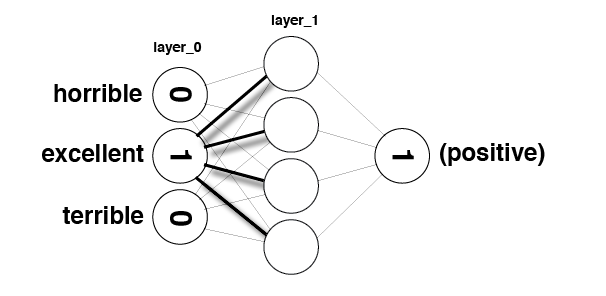

In [223]:
Image(filename='sentiment_network_sparse.png')

Looking at the image above we see that words that are negative should have similar weights to produce the desired output. This can be seen by using the following function which uses the trained neural network.
By multiplying the weights for a given word with all the weight vectors from words in the vocabulary we get values that represent how similar the word is to the others. A high value indicates that the weights are the same because of the multiplication.

In [231]:
def get_most_similar_words(focus = "horrible"):
    most_similar = Counter()

    for word in mlp_full.word2index.keys():
        most_similar[word] = np.dot(mlp_full.weights_0_1[mlp_full.word2index[word]],\
                                    mlp_full.weights_0_1[mlp_full.word2index[focus]])
    
    return most_similar.most_common()

In [234]:
get_most_similar_words("excellent")

[('excellent', 0.13672950757352476),
 ('perfect', 0.12548286087225946),
 ('amazing', 0.091827633925999727),
 ('today', 0.090223662694414217),
 ('wonderful', 0.089355976962214603),
 ('fun', 0.087504466674206874),
 ('great', 0.087141758882292059),
 ('best', 0.085810885617880653),
 ('liked', 0.077697629123843454),
 ('definitely', 0.076628781406966051),
 ('brilliant', 0.073423858769279052),
 ('loved', 0.073285428928122176),
 ('favorite', 0.072781136036160779),
 ('superb', 0.071736207178505068),
 ('fantastic', 0.070922191916266211),
 ('job', 0.069160617207634098),
 ('incredible', 0.066424077952614444),
 ('enjoyable', 0.06563256050288882),
 ('rare', 0.064819212662615089),
 ('highly', 0.063889453350970543),
 ('enjoyed', 0.062127546101812953),
 ('wonderfully', 0.062055178604090183),
 ('perfectly', 0.061093208811887387),
 ('fascinating', 0.060663547937493893),
 ('bit', 0.059655427045653076),
 ('gem', 0.0595108592961568),
 ('outstanding', 0.05886080814708302),
 ('beautiful', 0.058613934703162077

In [237]:
get_most_similar_words("terrible")

[('worst', 0.16966107259049848),
 ('awful', 0.12026847019691246),
 ('waste', 0.11945367265311008),
 ('poor', 0.092758887574435497),
 ('terrible', 0.09142538719772797),
 ('dull', 0.084209271678223618),
 ('poorly', 0.081241544516042027),
 ('disappointment', 0.080064759621368733),
 ('fails', 0.07859977372333754),
 ('disappointing', 0.077339485480323378),
 ('boring', 0.077127858748012909),
 ('unfortunately', 0.075502449705859093),
 ('worse', 0.070601835364194676),
 ('mess', 0.070564299623590426),
 ('stupid', 0.069484822832543092),
 ('badly', 0.066888903666228572),
 ('annoying', 0.065687021903374151),
 ('bad', 0.063093814537572124),
 ('save', 0.062880597495865748),
 ('disappointed', 0.06269235381207286),
 ('wasted', 0.061387183028051295),
 ('supposed', 0.060985452957725159),
 ('horrible', 0.060121772339380139),
 ('laughable', 0.058698406285467644),
 ('crap', 0.05810452866788459),
 ('basically', 0.057218840369636176),
 ('nothing', 0.057158220043034211),
 ('ridiculous', 0.056905481068931445),

However, the network does not know that these words have the same meaning generally it just knows that they have the same meaning in the context of the single output neuron. The similar words exist to create the same effect to the output neuron.
All negative words have a similar weighted vector coming out of them and the same goes for the positive words.

Now we use TF-IDF: take a high dim vector to create a two dim vector by clustering the high dimension to two dimensions
We color words that are positive green and words that are negative in black. Because the vectors are similar it shows us how they are clustered.

In [227]:
import matplotlib.colors as colors

words_to_visualize = list()
for word, ratio in pos_neg_ratios.most_common(500):
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)
    
for word, ratio in list(reversed(pos_neg_ratios.most_common()))[0:500]:
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)

In [228]:
pos = 0
neg = 0

colors_list = list()
vectors_list = list()
for word in words_to_visualize:
    if word in pos_neg_ratios.keys():
        vectors_list.append(mlp_full.weights_0_1[mlp_full.word2index[word]])
        if(pos_neg_ratios[word] > 0):
            pos+=1
            colors_list.append("#00ff00")
        else:
            neg+=1
            colors_list.append("#000000")

In [229]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
words_top_ted_tsne = tsne.fit_transform(vectors_list)

In [230]:
p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="vector T-SNE for most polarized words")

source = ColumnDataSource(data=dict(x1=words_top_ted_tsne[:,0],
                                    x2=words_top_ted_tsne[:,1],
                                    names=words_to_visualize))

p.scatter(x="x1", y="x2", size=8, source=source,color=colors_list)

word_labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(word_labels)

show(p)

# green indicates positive words, black indicates negative words

/usr/local/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/usr/local/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)


This is a vector space. We see that the neural network clustered the positive words in big long green clusters and the same goes for the negative words with big long black clusters. We only have few overlapping words in some clusters